<div class="alert alert-block alert-info">
    <h2><strong><center>Import Library</center><strong></h2>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [60]:
plt.rcParams["font.sans-serif"] = ['SimHei']

<div class="alert alert-block alert-info">
    <h2><strong><center>Input Data</center><strong></h2>

In [100]:
DP_filename = "../result/DPResult.txt"
Leader_filename = "../result/LeaderResult.txt"
Follow_NP_dir = "../result/NP/FollowResult*"
Follow_SH_dir = "../result/SH/FollowResult*"
Follow_MB_dir = "../result/MB/FollowResult*"

In [13]:
dp_df = pd.DataFrame(columns = ["space", "speed", "limit"])
for line in open(DP_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    dp_df = dp_df.append({"space": float(strs[0]), "speed": float(strs[1]), "limit": float(strs[2])}, ignore_index = True)

In [16]:
leader_df = pd.DataFrame(columns = ["space", "speed", "force"])
for line in open(Leader_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    leader_df = leader_df.append({"space": float(strs[0]), "speed": float(strs[1]), "force": float(strs[2])}, ignore_index = True)

In [101]:
follow_filenames = glob.glob(Follow_NP_dir)
follow_NP_df = {}
for filename in follow_filenames:
    train_id = int(filename[-5])
    tmp_df = pd.DataFrame(columns = ["space", "speed", "force", "time"])
    for line in open(filename,"r"): #设置文件对象并读取每一行文件
        strs = line.split(" ")
        tmp_df = tmp_df.append({"space": float(strs[0]), "speed": float(strs[1]), "force": float(strs[2]), "time": float(strs[3])}, ignore_index = True)
    follow_NP_df[train_id] = tmp_df 

In [102]:
follow_filenames = glob.glob(Follow_SH_dir)
follow_SH_df = {}
for filename in follow_filenames:
    train_id = int(filename[-5])
    tmp_df = pd.DataFrame(columns = ["space", "speed", "force", "time"])
    for line in open(filename,"r"): #设置文件对象并读取每一行文件
        strs = line.split(" ")
        tmp_df = tmp_df.append({"space": float(strs[0]), "speed": float(strs[1]), "force": float(strs[2]), "time": float(strs[3])}, ignore_index = True)
    follow_SH_df[train_id] = tmp_df 

In [ ]:
follow_filenames = glob.glob(Follow_MB_dir)
follow_MB_df = {}
for filename in follow_filenames:
    train_id = int(filename[-5])
    tmp_df = pd.DataFrame(columns = ["space", "speed", "force", "time"])
    for line in open(filename,"r"): #设置文件对象并读取每一行文件
        strs = line.split(" ")
        tmp_df = tmp_df.append({"space": float(strs[0]), "speed": float(strs[1]), "force": float(strs[2]), "time": float(strs[3])}, ignore_index = True)
    follow_MB_df[train_id] = tmp_df 

<div class="alert alert-block alert-info">
    <h2><strong><center>Visualization</center><strong></h2>

## Leader Control

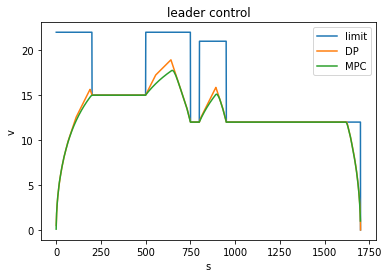

In [62]:
plt.plot(dp_df["space"], dp_df["limit"])
plt.plot(dp_df["space"], dp_df["speed"])
plt.plot(leader_df["space"], leader_df["speed"])
plt.legend(["limit", "DP", "MPC"])
plt.xlabel("s")
plt.ylabel("v")
plt.savefig("DPSpeedVSLimitCurve.png")
plt.title("leader control")
plt.show()

## Convoy Control

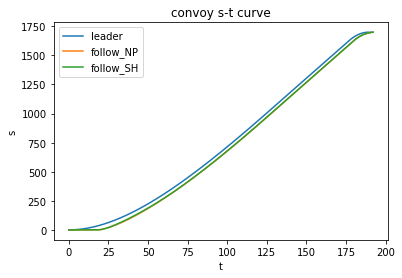

In [103]:
plt.plot(follow_NP_df[0]["time"], follow_NP_df[0]["space"])
plt.plot(follow_NP_df[1]["time"], follow_NP_df[1]["space"])
plt.plot(follow_SH_df[1]["time"], follow_SH_df[1]["space"])
plt.xlabel("t")
plt.ylabel("s")
plt.title("convoy s-t curve")
plt.legend(["leader", "follow_NP", "follow_SH"])

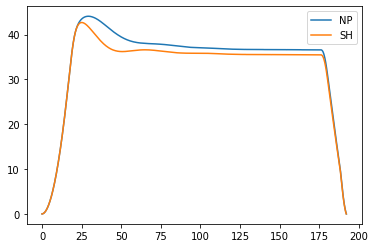

In [105]:
plt.plot(follow_NP_df[1]["time"], follow_NP_df[0]["space"] - follow_NP_df[1]["space"])
plt.plot(follow_SH_df[1]["time"], follow_SH_df[0]["space"] - follow_SH_df[1]["space"])
plt.legend(["NP", "SH"])

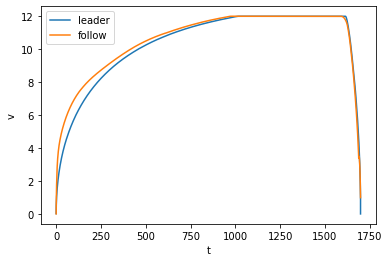

In [107]:
plt.plot(follow_NP_df[0]["space"], follow_NP_df[0]["speed"])
plt.plot(follow_NP_df[1]["space"], follow_NP_df[1]["speed"])
plt.xlabel("t")
plt.ylabel("v")
plt.legend(["leader", "follow"])